In [38]:
import math

import numpy as np
from sympy.solvers import solve
import matplotlib.pyplot as plt
from sympy import Symbol
from mpmath import *
import sympy as sp

In [39]:
# частный случай x1 < x2 = x3 < x4 (5.2 Boundary b2)
def Real_roots_4 (x1, x2, x3, x4):
    for i in range(0, len(z_values)):
        h = x4*math.exp(math.sqrt(13*(x3-x1)*(x4-x3))*y*z_values[i])
        p3 = ((h-x4)*(h-x4)*(x3-x1))/((h-x4)*(h-x4)+ 4*h*(x4 -x3))
        p3_array.append(p3)

In [40]:
# частный случай x1 < x2 < x3 = x4 (5.3 Boundary b3)
def Real_roots_3_and_2_coincide(x1, x2, x3, x4):
    for i in range(0, len(z_values)):
        h = math.cos(y*math.sqrt(13*(x3-x1)*(x3-x2))*z_values[i])
        p3 = (x2* (1-h))/((-x2)*h +2 -x2)
        p3_array.append(p3)

In [41]:
# область 3-4 из статьи x1 < x2 < x3 < x4
def Area_3_4 (x1, x2, x3, x4):
    m = math.sqrt((x4 - x3)*(x2 - x1)/((x3-x1)*(x4-x2)))
    for i in range(0, len(z_values)):
        sn = ellipfun('sn', 0.5*math.sqrt(13 * (x3-x1)*(x4-x2)) * y * z_values[i], m**2)
        cn_array.append(sn)
        p3 = (x1 *(x4-x2) + x4*(x2-x1) * sn * sn)/ ((x4-x2+(x2-x1)*sn*sn))
        p3_array.append(p3)

In [42]:
def Area_1_2 (p):
    # перевод корней в привычные типы - float и complex
    p_Re = []
    for rt in p:
        if (abs(rt - abs(rt)) < eps) or (abs(rt + abs(rt)) < eps):
            p_Re.append(float(rt))
    x1 = p_Re[0]
    x2 = p_Re[1]

    x3 = float(p[2] + p[3]) / 2
    x4 = float((p[3] - p[2]) / (2j))
    c = math.sqrt((x2 - x3) ** 2 + x4 ** 2)
    d = math.sqrt((x1 - x3) ** 2 + x4 ** 2)
    k = math.sqrt(c*d)
    m = math.sqrt((k*k + ((x3 - x1)*(x2 - x3) - x4*x4))/(2*k*k))


    for i in range(0, len(z_values)):
        cn = ellipfun('cn', -math.sqrt(13 * c * d) * y * z_values[i], m**2)
        cn_array.append(cn)
        p3 = (c * x1 - d * x2 + cn * (c * x1 + d * x2)) / (cn * (c - d) + c + d)
        p3_array.append(p3)

In [43]:
# Задаем параметры
Lz = 1
h = 10**(-3)
eps1, eps2 = 10**(-9), 10**(-12)
eps = 10**(-9)
i = complex(0, 1)
A1_next_n = A1_next = 1
A3_next_n = A3_next = 0
y = 1
N = Lz*10**3 - 1
delta_k =  -0.1

z_all = np.arange(0, 5+h, h)
A_all = np.exp(-i * z_all)
z_values, A1_values, A3_values = [], [], []
I1, I3 = [], []
p3_array, cn_array = [], []
I30_array = []
b = delta_k/y

In [44]:
for z in z_all:
    while True:
        flag = 0
        A1_n_n = ((-1) * i * y * h * ((
                (A1_next_n + A1_next)/2) * ((abs(A1_next_n))**2 + abs(A1_next)**2)/2 + 2 * (
                (A1_next_n + A1_next)/2) * ((abs(A3_next_n))**2 + (abs(A3_next))**2)/2 + (
                (A3_next_n + A3_next)/2) * ((A1_next_n.conjugate())**2 + A1_next_n.conjugate() * A1_next.conjugate() + A1_next.conjugate()**2)/3) + A1_next
                  + i*h*(A1_next_n + A1_next)*delta_k/4)
        A3_n_n = ((-1) * i * y * h *((
                6*(A3_next_n + A3_next)/2) * (abs(A1_next_n) ** 2 + abs(A1_next) ** 2) / 2 + 3 * (
                (A3_next_n + A3_next) / 2) * ((abs(A3_next_n) ** 2 + (abs(A3_next)) ** 2) / 2) + (
                A1_next_n**3 + A1_next**3) / 2) + A3_next
                  + i*h*(A3_next_n + A3_next)*delta_k/4)

        if (abs(A1_n_n - A1_next_n) < eps1 * abs(A1_next_n) + eps2 and
                abs(A3_n_n - A3_next_n) < eps1 * abs(A3_next_n) + eps2):
            z_values.append(z)
            A1_values.append(A1_n_n)
            A3_values.append(A3_n_n)

            # проверка 1ого инварианта
            I1.append(abs(A1_n_n) ** 2 + abs(A3_n_n) ** 2)
            # проверка 3ого инварианта
            I3.append(3 / 2 * y * (
                    abs(A1_n_n) ** 4 + 4 * abs(A1_n_n) ** 2 * abs(A3_n_n) ** 2 + abs(A3_n_n) ** 4) + y * (
                              A3_n_n * (A1_n_n.conjugate()) ** 3 + (A3_n_n.conjugate()) * A1_n_n ** 3) - (
                                  3 * abs(A1_n_n) ** 2 + abs(A3_n_n) ** 2) * delta_k / 2)

            break

        A1_next_n = A1_n_n
        A3_next_n = A3_n_n

    # Шаг
    A1_next = A1_n_n
    A3_next = A3_n_n

I30 = 2 * I3[0] - 3 * y * I1[0] ** 2 + 3 * delta_k * I1[0]

In [45]:
p3 = sp.symbols('p3')
s = 0
polynom = -13*p3**4 + (30 + 6*b)*p3**3 - (21 + 6*b + b**2 + 3*s)*p3**2 + (4 + b*s + 3*s)*p3 - s**2/4
eps = 10**(-7)

In [ ]:
# решаем полином, находим сколько вещ и сколько комплексных корней

poly = sp.Poly(polynom, p3)
print(poly)
roots = poly.nroots()
print(roots)
p = [root.evalf() for root in roots]
real_solutions_prob = []
for sol in p:
    if (abs(sol-abs(sol))<eps):
        real_solutions_prob.append((abs(sol)))
    elif (abs(sol+abs(sol))<eps):
        real_solutions_prob.append(-(abs(sol)))
    else:
        real_solutions_prob.append((sol))
    
    real_solutions1 = [sol.evalf() for sol in real_solutions_prob if sol.is_real] # только вещ корни
print("p = ", p)
print("real_solutions1 = ", real_solutions1)

[0, 0.329843788128358, 0.961538461538482, 0.970156211871622]
p =  [0, 0.329843788128358, 0.961538461538482, 0.970156211871622]
real_solutions1 =  [0, 0.329843788128358, 0.961538461538482, 0.970156211871622]


In [47]:
if len(real_solutions1) == 2:
    print("2 вещ + 2 комплекс")
    Area_1_2(p)
elif len(real_solutions1) == len(p):
    real_solutions1.sort()
    x1, x2, x3, x4 = real_solutions1
    if  x1 < x2 < x3 < x4:
        print("4 вещ корня x1 < x2 < x3 < x4")
        Area_3_4(x1, x2, x3, x4)
    elif x1 < x2 == x3 < x4:
        print("частный случай  x1 < x2 == x3 < x4")
        Real_roots_4(x1, x2, x3, x4)
    elif x1 < x2 < x3 == x4:
        print("частный случай x1 < x2 < x3 == x4")
        Real_roots_3_and_2_coincide(x1, x2, x3, x4)

4 вещ корня x1 < x2 < x3 < x4


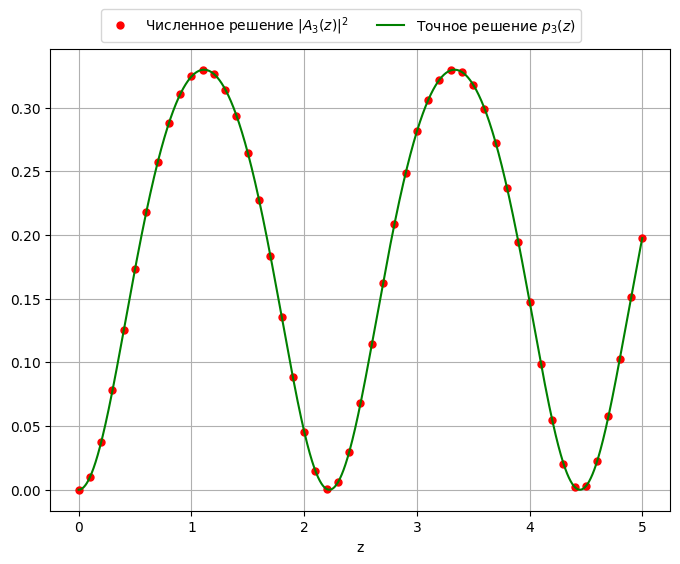

In [48]:
# график
plt.figure(figsize=(8, 6))
#plt.plot(z_values, abs(np.array(A1_values)**2), color='r', linestyle='-')
plt.plot(z_values, abs(np.array(A3_values)**2), 'r.',markevery=100,markersize=10,label='Численное решение $|A_3(z)|^2$')
plt.plot(z_values, abs(np.array(p3_array)), color='g', linestyle='-',label='Точное решение $p_3(z)$')
plt.xlabel('z')

# Размещение легенды
plt.legend(loc='upper left', bbox_to_anchor=(0.07, 1.1), ncol=2) 

plt.grid(True)
plt.show()